# Lab 4. Probabilistic Inference
# Task 4.1 Iris Classification Using Naïve Bayes
## Problem Descriptions
This problem aims to implement a Naive Bayes classifier to predict the flower species into the specific iris class given 2 features (sepal length, petal length) and 4 features (sepal length, sepal width, petal length, and petal width). Firstly, the problem is formulated by using the Naive Bayes method as follows.

---
Assuming conditional independence between 2 features (f1=sepal length, f2=petal length) given 3 species class(c1=Sentosa iris class, c2=Versicolour iris class, c3=Virginica iris class).

                  𝑃(𝑐𝑖|𝑓1, 𝑓2) = 𝛼𝑃(𝑓1|𝑐𝑖) 𝑃(𝑓2|𝑐𝑖) 𝑃(𝑐𝑖)

* 𝑐𝑖: iris class of flower, where i=1,2,3.

*  𝑃(𝑐𝑖|𝑓1, 𝑓2): Posterior probability of iris class ci given f1 and  f2 features.
* 𝑃(𝑓1|𝑐𝑖): Conditional probability of f1 occuring given ci has occured.
*  𝑃(𝑓2|𝑐𝑖): Conditional probability of f2 occuring given ci has occured.
*  P(ci): Probability of iris class ci occurs.


---
Assuming conditional independence between 4 features (f1=sepal length, f2=sepal width, f3=petal length, f4=petal width),  given 3 species class.

             𝑃(𝑐𝑖|𝑓1, 𝑓2,𝑓3, 𝑓4) = 𝛼𝑃(𝑓1|𝑐𝑖) 𝑃(𝑓2|𝑐𝑖) 𝑃(𝑓3|𝑐𝑖) 𝑃(𝑓4|𝑐𝑖) 𝑃(𝑐𝑖)

We need to identify the prior probability 𝑃(𝑐𝑖) of each iris class and the conditional probabilities 𝑃(𝑓1|𝑐𝑖), 𝑃(𝑓2|𝑐𝑖), 𝑃(𝑓3|𝑐𝑖),  P(𝑓4|𝑐𝑖) first in order to estimate the posterior probability of species given  features 𝑃(𝑐𝑖| 𝑓1, 𝑓2,𝑓3, 𝑓4) where i=1,2,3 for the three species.




## Implementation and Results

In [ ]:
!pip install sklearn
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_validate

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
# We only use two features (sepal and petal length)
iris = datasets.load_iris()
X = iris.data
#X = iris.data[:, [0,2]]
Y = iris.target

# split the dataset into training (80%) and testing (20%), and fit the data into the naive Bayes model
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
nb = GaussianNB()
nb.fit(X_train, Y_train)

# Use the naive Bayes model we just built to predict on the testing set, and display the results.
Y_pred = nb.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
cm = confusion_matrix(Y_test, Y_pred)
cr = classification_report(Y_test, Y_pred)
print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)
print("Prior:\n", nb.class_prior_)
print("Mean:\n", nb.theta_)
#print("Variance:\n", nb.sigma_)


Accuracy: 1.0
Confusion Matrix:
 [[13  0  0]
 [ 0  9  0]
 [ 0  0  8]]
Prior:
 [0.30833333 0.34166667 0.35      ]
Mean:
 [[5.04054054 3.44594595 1.44324324 0.24864865]
 [5.93414634 2.77073171 4.27073171 1.32439024]
 [6.6047619  2.96904762 5.54047619 2.        ]]


<ipython-input-35-3adf63fc48a2>:9: UserWarning: You passed a edgecolor/edgecolors ('r') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(error_data[:,0], error_data[:,1], marker='x', facecolors='r', edgecolors='r', s=64)


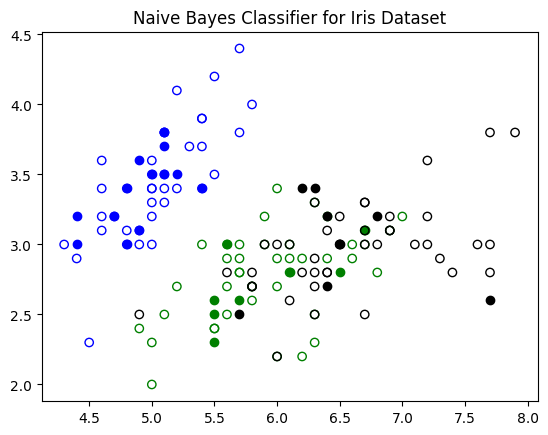

In [ ]:
colours = 'bgk'
for i, colour in enumerate(colours):
  train_data = X_train[Y_train == i]
  plt.scatter(train_data[:,0], train_data[:,1], marker='o', facecolors='none', edgecolors=colour)
  test_data = X_test[Y_pred == i]
  plt.scatter(test_data[:,0], test_data[:,1], marker='o', facecolors=colour, edgecolors=colour)

error_data = X_test[Y_pred != Y_test]
plt.scatter(error_data[:,0], error_data[:,1], marker='x', facecolors='r', edgecolors='r', s=64)

#ellipse = patches.Ellipse(xy=nb.theta_[0], width=nb.sigma_[0][0]*10, height=nb.sigma_[0][1]*10, edgecolor='b', fc='none')
#ellipse = patches.Ellipse(xy=(5,2), width=2, height=1)
#ax = plt.gca()
#ax.add_patch(ellipse)

plt.title("Naive Bayes Classifier for Iris Dataset")
plt.show()

## Discussions
In this task, we implement iris classification using the Naive Bayes model with 2 features and 4 features respectively. Prediction results are shown below.
####Given 2 features
             Accuracy: 0.8333333333333334
             Confusion Matrix:
             [[10  0  0]
              [ 0  7  2]
              [ 0  3  8]]
             Prior:
             [0.33333333 0.34166667 0.325     ]
             Mean:
             [[4.985      1.4525    ]
             [5.87804878 4.23414634]
             [6.65641026 5.57435897]]
![picture](https://github.com/mengheng02/image-file/blob/main/naive%20bayes%20plot%20using%202%20features.png?raw=true)

Given 2 features, the trained Naive Bayes classifier provides an accuracy of 83.34%. The classifier correctly classifies 10 instances from class 1. For class 2, it successfully classifies 7 instances but incorrectly predicted 2 instances as belonging to class 3. For class 3, it correctly predicted 8 instances, but 3 instances of class 3 were incorrectly predicted as class 2.

From the prior probability, we can infer that class 1 makes up 33.33% of the data, class 2 makes up 34.17% of the data, and class 3 makes up 32.5% of the data. The calculated mean of each feature can be interpreted as follow.

          Class        M.sepal length        M.petal length    
             c1           5.04cm                1.44cm        
             c2           5.93cm                4.27cm
             c3           6.60cm                5.54cm

From the mean value of each feature, we can infer that the classifier performs very well for class 1 because its mean petal length is far shorter than other classes. This can be reflected on the scatter plot, points (blue point) of class 1 are well separated from others.  However, there is confusion in distinguishing some points of class 2 and class 3 because they have close mean sepal and petal length. Those points from different classes are overlapped and it's likely to produce incorrect predictions at the boundary between class 2 and class 3. As a result, 5 incorrect predictions are found, which correspond to 2 instances from class 2, and 3 instances from class 3.

####Given 4 features (full iris dataset)
              Accuracy: 1.0
              Confusion Matrix:
              [[10  0  0]
               [ 0  8  0]
               [ 0  0 12]]
              Prior:
              [0.30833333 0.34166667 0.35      ]
              Mean:
              [[5.04054054 3.44594595 1.44324324 0.24864865]
              [5.93414634 2.77073171 4.27073171 1.32439024]
              [6.6047619  2.96904762 5.54047619 2.        ]]
              
![picture](https://github.com/mengheng02/image-file/blob/main/correct%20version%20of%20iris%20prediction%20using%204%20features.png?raw=true)

Given 4 features, the trained Naive Bayes classifier provides a perfect accuracy of 100%. It correctly predicted all 10 instances from class 1, 8 instances from class 2, and 12 instances from class 3.

From the prior probability, we can infer that class 1 makes up 30.83% of the data, class 2 makes up 34.17% of the data, and class 3 makes up 35% of the data. The mean result can be interpreted as follow.

         M.sepal length    M.sepal width    M.petal length    M.petal width
    c1           5.04cm           3.45cm            1.44cm           0.25cm
    c2           5.93cm           2.77cm            4.27cm           1.32cm
    c3           6.60cm           2.97cm            5.54cm           2.00cm

By looking at the scatter plot, the classifier still performs very well in distinguishing class 1 (blue points) from other classes but there is still an overlapping of class 2 and class 3. Despite there being a mixing pattern of classes 2 and 3, the classifier still perfectly distinguished them into the correct class given 4 features. However, there is still a risk of wrong prediction because class 2 and class 3 are still not well separated according to the scatter plot.

As a conclusion, the classifier will perform better if more features are fed into model training, as greater features will magnify the difference between classes.

